In [49]:
from stable_baselines3 import TD3
from stable_baselines3.common.noise import NormalActionNoise
from stable_baselines3.common.callbacks import BaseCallback
from typing import TYPE_CHECKING, Any, Callable, Optional, Union
from stable_baselines3.common.vec_env import DummyVecEnv, VecEnv, sync_envs_normalization
from stable_baselines3.common.logger import Logger
import gymnasium as gym
from gym.wrappers import RecordVideo
import numpy as np
import os
import matplotlib.pyplot as plt
from pyvirtualdisplay import Display
from stable_baselines3.common.monitor import Monitor
import pandas as pd


np.bool8 = np.bool_

In [50]:
training = 1000000

# Load the environment and model
env = gym.make("InvertedPendulum-v4", render_mode="rgb_array")  # Render for visualization
monitor_env = Monitor(env,f"./logs/{training}_timesteps/log")

n_actions = env.action_space.shape[-1]

action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))

model = TD3("MlpPolicy", monitor_env, action_noise=action_noise)

model = model.learn(training)

save_dir = f"./checkpoints/learning_curve/{training}_model"

model.save(save_dir)
print("done")

C:\Users\Indum\AppData\Local\Programs\Python\Python311\Lib\site-packages\gymnasium\envs\registration.py:517: DeprecationWarning: WARN: The environment InvertedPendulum-v4 is out of date. You should consider upgrading to version `v5`.
  logger.deprecation(


done


In [51]:
env = gym.make("InvertedPendulum-v4", render_mode="rgb_array") 
loaded_model = TD3.load(save_dir,env=env)
video_save_freq = training
folder_path = f"videos/fully_trained/timesteps_{training}"
os.makedirs(folder_path, exist_ok=True)
env = RecordVideo(env, video_folder=folder_path, name_prefix="eval_best_run",episode_trigger=lambda e:e % video_save_freq == 0)
obs,info = env.reset()

#test trained model
done = False
truncated = False
total_episode_reward = 0
trajectory = []
actions = []

#execute one episode in the environment, collect data
while not (done or truncated):
    # Predict action using the trained model
    action, _ = model.predict(obs, deterministic=True)
    actions.append(action)
    # Take the action in the environment
    obs, reward, done,truncated, info = env.step(action)
    # Collect data
    trajectory.append((obs, action, reward))
    total_episode_reward += reward
    
actions = np.array(actions)
#print(actions)

C:\Users\Indum\AppData\Local\Programs\Python\Python311\Lib\site-packages\gymnasium\envs\registration.py:517: DeprecationWarning: WARN: The environment InvertedPendulum-v4 is out of date. You should consider upgrading to version `v5`.
  logger.deprecation(
C:\Users\Indum\AppData\Local\Programs\Python\Python311\Lib\site-packages\gym\wrappers\record_video.py:75: UserWarning: WARN: Overwriting existing videos at C:\Users\Indum\Documents\Year4\Reinforcement_Learning\Lab\Coursework2\stable-baselines3-master\videos\fully_trained\timesteps_1000000 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


MoviePy - Building video C:\Users\Indum\Documents\Year4\Reinforcement_Learning\Lab\Coursework2\stable-baselines3-master\videos\fully_trained\timesteps_1000000\eval_best_run-episode-0.mp4.
MoviePy - Writing video C:\Users\Indum\Documents\Year4\Reinforcement_Learning\Lab\Coursework2\stable-baselines3-master\videos\fully_trained\timesteps_1000000\eval_best_run-episode-0.mp4



MoviePy - Done !
MoviePy - video ready C:\Users\Indum\Documents\Year4\Reinforcement_Learning\Lab\Coursework2\stable-baselines3-master\videos\fully_trained\timesteps_1000000\eval_best_run-episode-0.mp4


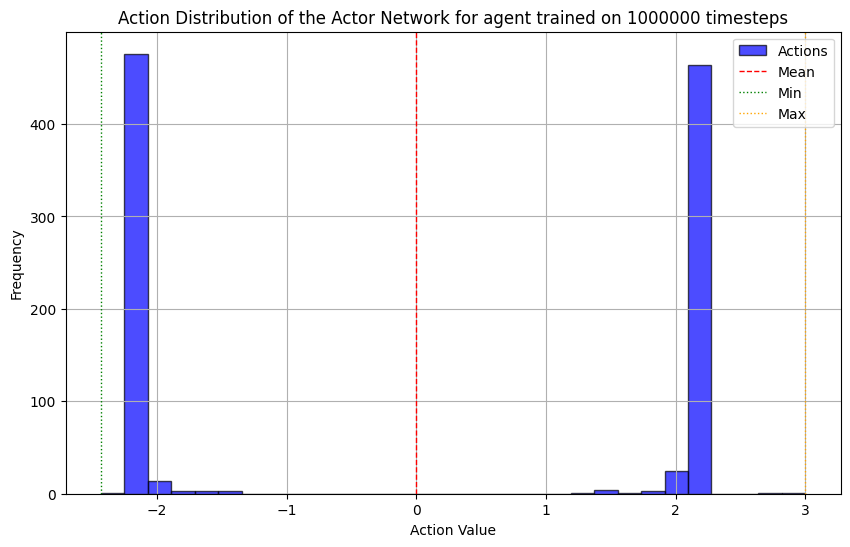

In [52]:
#create Action Distribution Figure
plt.figure(figsize=(10, 6))
plt.hist(actions, bins=30, alpha=0.7, color="blue", edgecolor="black", label="Actions")
plt.axvline(actions.mean(), color="red", linestyle="dashed", linewidth=1, label="Mean")
plt.axvline(actions.min(), color="green", linestyle="dotted", linewidth=1, label="Min")
plt.axvline(actions.max(), color="orange", linestyle="dotted", linewidth=1, label="Max")
plt.xlabel("Action Value")
plt.ylabel("Frequency")
plt.title(f"Action Distribution of the Actor Network for agent trained on {training} timesteps")
plt.legend()
plt.grid(True)
action_path = f"videos/fully_trained/timesteps_{training}/Action Distribution for agent trained on {training} timesteps"
os.makedirs(f"videos/fully_trained/timesteps_{training}/", exist_ok=True)
plt.savefig(action_path, dpi=300)
#plt.show()

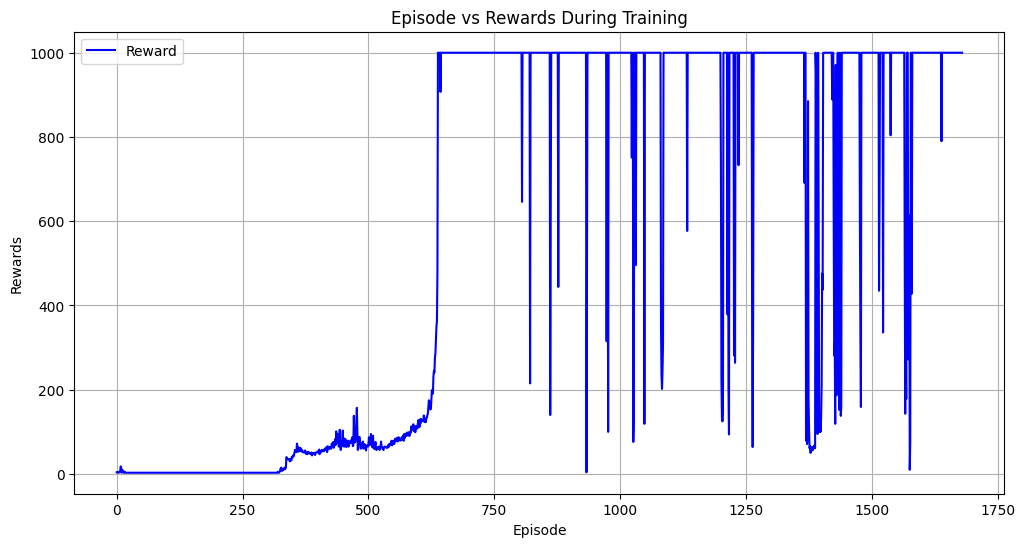

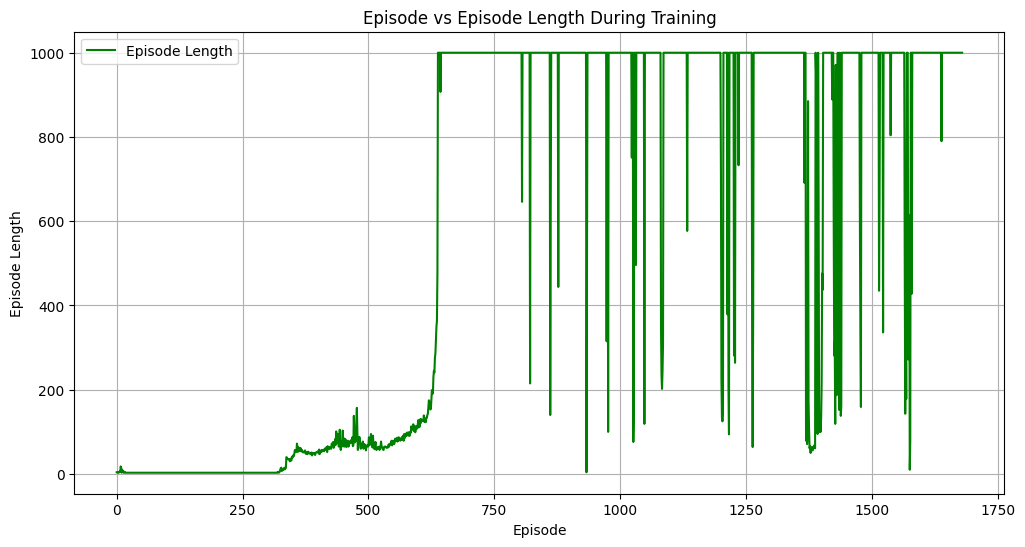

In [53]:
# Load the CSV file
ts = 1000000
file_path = f"./logs/{ts}_timesteps/log.monitor.csv"  # Update with the correct path if needed
data = pd.read_csv(file_path, skiprows=1)  # Skip metadata row

# Compute the moving average for rewards
#window_size = 5  # Define the moving average window
#data['moving_avg_r'] = data['r'].rolling(window=window_size).mean()

# Plot 1: Episode vs Rewards
plt.figure(figsize=(12, 6))
#plt.plot(data.index, data['moving_avg_r'], label=f'{window_size}-Episode Moving Average', color='blue')
plt.plot(data.index, data['r'], label='Reward', color='blue')
plt.title("Episode vs Rewards During Training")
plt.xlabel("Episode")
plt.ylabel("Rewards")
plt.legend()
plt.grid(True)
plt.savefig(f"./logs/{ts}_timesteps/episode_vs_rewards.png", dpi=300)
plt.show()


# Plot 2: Episode vs Episode Length
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['l'], label='Episode Length', color='green')
plt.title("Episode vs Episode Length During Training")
plt.xlabel("Episode")
plt.ylabel("Episode Length")
plt.legend()
plt.grid(True)
plt.savefig(f"./logs/{ts}_timesteps/episode_vs_ep_length.png", dpi=300)
plt.show()